In [1]:
# Plots data from the Summary dictionary.
# These are a few things that interest me about my year of activities
# The code can easily be changed to plot other things

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
from collections import Counter

In [3]:
DFs=pickle.load(open('DFs.pkl', 'rb'))
Summaries=pickle.load(open('Summaries.pkl', 'rb'))
print(len(DFs),len(Summaries))

412 412


In [4]:
minutes= np.array( [d['duration'].total_seconds()/60 for d in Summaries] )
(hist,bins)=np.histogram(minutes,bins=[0,15,30,60,90,120,999],density=False)
print(len(minutes), hist,hist.sum())

412 [ 36  44 143 128  42  19] 412


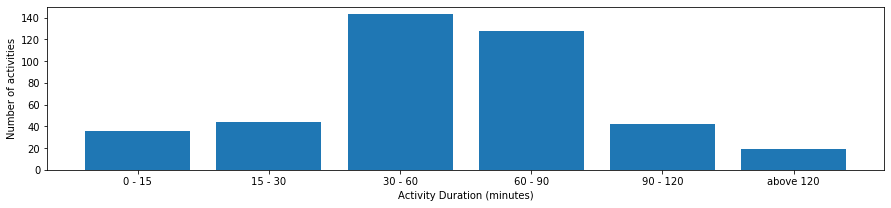

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 3) )

axs.bar(['0 - 15','15 - 30','30 - 60','60 - 90','90 - 120','above 120'],hist)
axs.set_xlabel('Activity Duration (minutes)')
axs.set_ylabel('Number of activities')

plt.show()

In [6]:
# Most activities are between half an hour and an hour and a half

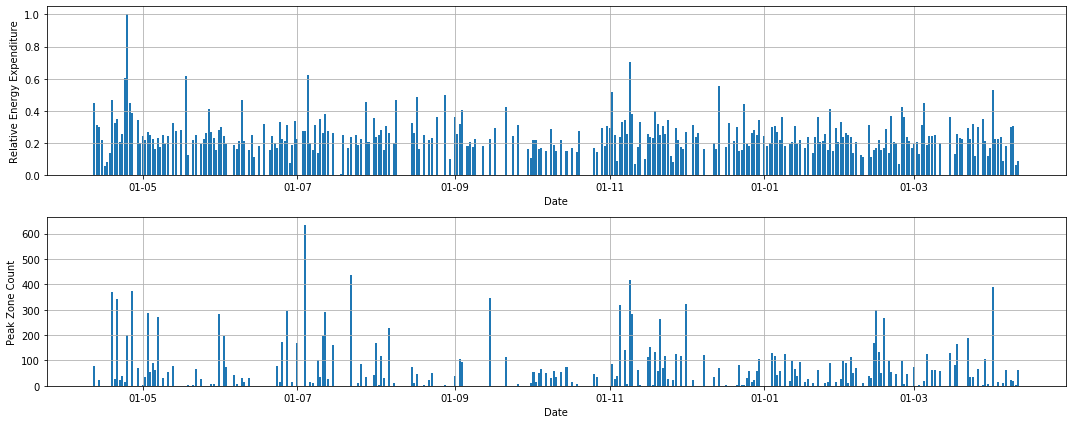

In [7]:
myFormat = DateFormatter("%d-%m")
register_matplotlib_converters(myFormat)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 2*3) )

x=[d['date'] for d in Summaries]

y1=[d['duration'].total_seconds()/60 for d in Summaries]
y1[22]=200        # Cap a single large item, to get clearer plots
y2=[d['meanBPM'] for d in Summaries]

# Research showed that wrist-worn heart-rate measures are quite accurate, but energy expenditure measures are not. 
# I am looking for a simple reliable formula, but for now I plot the relative energy expenditure in this dataset
# I first assume that energy expenditure is proportional to heart rate (first degree)
# See: Shcherbina, A. et al. (2017). Accuracy in wrist-worn, sensor-based measurements of heart rate 
# and energy expenditure in a diverse cohort. Journal of personalized medicine, 7(2), 3.

y=np.array(y1)*np.array(y2) # duration*meanBPM
m=y.max()
y3=y/m

axs[0].bar(x,y3)
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Relative Energy Expenditure')
axs[0].grid(True)  
axs[0].xaxis.set_major_formatter(myFormat)

#  am interested in high high heart-rate activities; I count heart rate instances above the Peak Zone limit 
# The count should be transformed to time, but it is used to get an impression of high intensity activities
# I am still looking for a better way to model the non-linear effect of heart rate 

y4=[d['peakZone'] for d in Summaries]
axs[1].bar(x,y4)
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Peak Zone Count')
axs[1].grid(True)  
axs[1].xaxis.set_major_formatter(myFormat)

fig.tight_layout()
plt.show()

In [8]:
# During the summer, swimming pools were open, so I did less of cycling and walking
# There are are only a few high Peak Zone Count activities in this period(I do not use Fitbit while swimming)
# More detailed analysis at the Heartrate-plot notebook